In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load image from dataset
image = cv2.imread(
    "../datasets/niab/EXP01/Top_Images/Annotated_Test_Dataset/imgs/Exp01_Block01_Image01_Pot005.jpg",
    cv2.IMREAD_COLOR,
)

In [3]:
# Resize the image and print the new dimensions
scale_percent = 10  # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
print("Resized Dimensions : ", resized.shape)

Resized Dimensions :  (345, 460, 3)


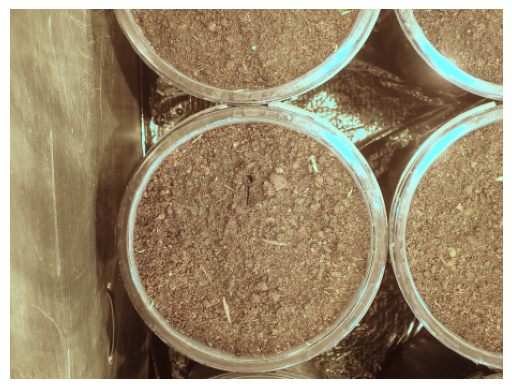

In [4]:
# Plot the images from cv2 in matplotlib
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

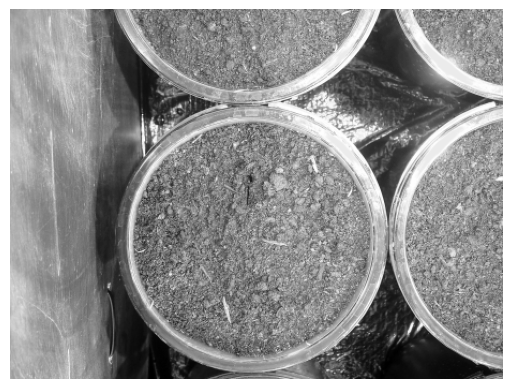

In [5]:
# Apply a grayscale filter to the image
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

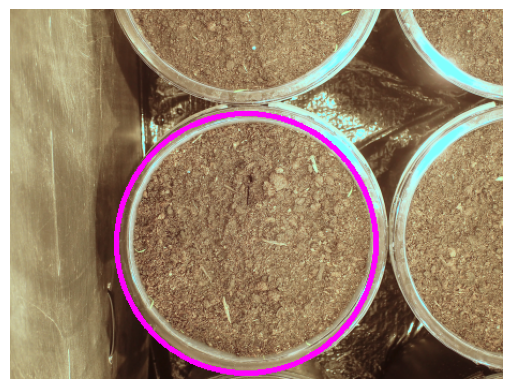

In [6]:
# Detect circles in the image using the Hough Circle Transform
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, 1, 50, param1=50, param2=30, minRadius=120, maxRadius=140
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(resized, center, radius, (255, 0, 255), 3)
        break  # Only draw the first circle

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()